##### 3.5. Решение линейного стока. Суперпозиция для произвольной истории дебитов

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.1 от 17.10.2023

Хабибуллин Ринат 2023 г.

---

In [1]:
# импортируем библиотеки для расчетов

# numpy используем для работы с массивами и подготовки данных для построения графиков. 
# Также в некоторых функциях используем возможности векторных расчетов numpy
import numpy as np

# matplotlib используем для построения графиков
import matplotlib.pyplot as plt

# scipy.special используем как альтернативный вариант расчета специальных функций
import scipy.special as sc


Решение линейного стока (с бесконечно малым радиусом скважины) можно представить в виде.

$$ 
p_D(r_D,t_D) = - \frac{1}{2} Ei \left(- \dfrac{ r_D^2}{4t_d} \right)
\tag{2.2.20}
\label{2.2.20}
$$

In [2]:
# Решение линейного стока уравнения фильтрации
def pd_ei(td, rd):
    """
    Решение линейного стока уравнения фильтрации
    rd - безразмерное расстояние
    td - безразмерное время
    """
    return -1/2*sc.expi(-rd**2 / 4 / td)


$$ r_D = \frac{r}{r_w} \tag{11.10} $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}  \tag{11.11}$$
$$ p_D = \frac{kh}{ 18.41 q_s B \mu} \left( p_i - p \right)  \tag{11.12} $$

Здесь использование единицы измерения СИ.
* $r_w$ - радиус скважины, м
* $r$ - расстояние от центра скважины до точки в пласте, м
* $q_s$ - дебит скважины на поверхности, приведенный к нормальным условиям м3/сут
* $\phi$ - пористость, доли единиц
* $\mu$ - вязкость нефти в пласте, сП
* $B$ - объемный коэффициент нефти, м3/м3
* $p_i$ - начальное давление в пласте, атм
* $p$ - давление на расстоянии $r$, атм
* $c_t$ - общая сжимаемость системы в пласте, 1/атм

In [3]:
# определим функции для перевода размерных переменных в безразмерные и обратно
# пригодится потом для построения графиков и ведения расчетов

# при наименовании функций придерживаемся следующих соглашений
# сначала идет название того, что считаем
# в конце указывается размерность результата, если это уместно

def r_from_rd_m(rd, rw_m=0.1):
    """
    перевод безразмерного расстояния в размерное
    rd -  безразмерное расстояние
    rw_m -  радиус скважины, м
    """
    return rd*rw_m

def rd_from_r(r_m, rw_m=0.1):
    """
    перевод размерного расстояния в безразмерное
    r_m - размерное расстояние, м
    rw_m - радиус скважины, м
    """
    return r_m/rw_m

def t_from_td_hr(td, k_mD=10, phi=0.2, mu_cP=1, ct_1atm=1e-5, rw_m=0.1):
    """
    перевод безразмерного времени в размерное, результат в часах
    td - безразмерное время
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return td * phi * mu_cP * ct_1atm * rw_m * rw_m / k_mD / 0.00036

def td_from_t(t_hr, k_mD=10, phi=0.2, mu_cP=1, ct_1atm=1e-5, rw_m=0.1):
    """
    перевод размерного времени в безразмерное
    t_hr - размерное время, час
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return  0.00036 * t_hr * k_mD / (phi * mu_cP * ct_1atm * rw_m * rw_m) 

def p_from_pd_atma(pd, k_mD=10, h_m=10, q_sm3day=20, b_m3m3=1.2, mu_cP=1, pi_atma=250):
    """
    перевод безразмерного давления в размерное, результат в абсолютных атмосферах
    pd - безразмерное давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return pi_atma - pd * 18.41 * q_sm3day * b_m3m3 * mu_cP / k_mD / h_m 

def pd_from_p(p_atma, k_mD=10, h_m=10, q_sm3day=20, b_m3m3=1.2, mu_cP=1, pi_atma=250):
    """
    перевод размерного давления в безразмерное
    p_atma - давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return (pi_atma - p_atma) / (18.41 * q_sm3day * b_m3m3 * mu_cP) * k_mD * h_m 

# 14.2 Случай для произвольной истории дебитов (ступенчатое изменение дебита) <a class="anchor" id="14.2"></a>

Для расчета изменения давления при переменном дебите введем произвольное референсное значение дебита $ q_{ref} $ (например первое не нулевое значение дебита при запуске скважины). Используем это значение для определения безразмерного давления.
$$ p_D = \frac{kh}{ 18.41 q_{ref} B \mu} \left( p_i - p \right) $$

и безразмерного дебита 

$$q_D = \frac{q}{q_{ref}}$$

Тогда, используя принцип суперпозиции, можем выписать выражение для изменения давления на скважине и вокруг нее для произвольного момента времени

$$P_{mr.D}(t_D, r_D) = \sum_i \left[ q_{D(i)}-q_{D(i-1)} \right] \cdot p_D\left(t_D-t_{D(i)}, r_D\right)\cdot \mathcal{H}(t_D-t_{D(i)}) \tag{14.2} $$

где

* $i$ - индекс значения дебита в таблице изменения дебитов
* $q_{D(i)}$ - безразмерный дебит с номером $i$, который стартует в момент времени $t_i$. Для первого момента времени $i$ дебит следующий перед ним считается равным нулю
* $t_{D(i)}$ - безразмерный момент времени - включения дебита с номером $i$
* $t_{D}$ - безразмерный момент времени для которого проводится расчет
* $\mathcal{H}$ - ступенчатая [функция Хевисайда](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%A5%D0%B5%D0%B2%D0%B8%D1%81%D0%B0%D0%B9%D0%B4%D0%B0#:~:text=%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F%20%D0%A5%D0%B5%D0%B2%D0%B8%D1%81%D0%B0%D0%B9%D0%B4%D0%B0%20%D1%88%D0%B8%D1%80%D0%BE%D0%BA%D0%BE%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B5%D1%82%D1%81%D1%8F%20%D0%B2,%D0%B4%D0%BB%D1%8F%20%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%B8%20%D1%8D%D0%BC%D0%BF%D0%B8%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F.)
* $p_D\left(t\right)$ - зависимость безразмерного давление от времени - решение задачи запуска скважины с постоянным единичным дебитом
* $P_{mr.D} $ - безразмерное давление $P_{mr.D}(t_D, r_D)$ учитывающее историю изменения дебитов скважины

In [4]:
# создадим историю изменения дебитов 

t_history = np.array([ 0., 2., 24. ], dtype=np.float64) 
q_history = np.array([10., 5., 0.], dtype=np.float64)

# массивы должны быть одной и той же длины

In [5]:
def pd_superposition(td, td_hist, qd_hist, rd):
    """
    расчет безразмерного давления для последовательности безразмерных дебитов
    td -  время расчета после запуска, безразмерное
    td_hist - массив времен изменения режимов работы скважин, безразмерное
    qd_hist - массив дебитов установленных после изменения режима работы, безразмерное
    """
    # принудительно добавим нули во входные массивы, чтобы учесть запуск скважины
    qdh = np.hstack([0, qd_hist])
    tdh = np.hstack([0, td_hist])
    # построим дебиты виртуальных скважин - разности реальных дебитов при переключении
    delta_qd = np.hstack([0, np.diff(qdh)])
    # референсный безразмерный дебит это 1
    
    # векторная магия - время может быть вектором и переключения дебитов тоже вектор
    # надо организовать сумму по временам, каждая из котороых сумма по переключениям
    # делаем при помощи расчета meshgrid и поиска накопленных сумм
    qd_v, td_v =np.meshgrid(delta_qd, td)
    # используем куммулятивную сумму numpy для того что суммировать результаты
    dpd = np.cumsum(qd_v * pd_ei((td_v - tdh), rd) * np.heaviside((td_v - tdh), 1),1 )
    # последний столбец - полная сумма, которая нужна в качестве результата
    return dpd[:,-1]


def q_superposition(t, t_hist, q_hist):
    """
    расчет давления для запуска и последующей остановки скважины
    t_hr - время после запуска в часах
    t_hist_hr - массив времен изменения режимов работы скважин
    q_hist_sm3day - массив дебитов установленных после изменения режима работы
    """
    def interpolate_constant(x, xp, yp):
        indices = np.searchsorted(xp, x, side='right')
        y = np.concatenate(([0], yp))
        return y[indices]

    q=[]
    for ti in t:
        q.append(interpolate_constant(ti, t_hist, q_hist))
    return q

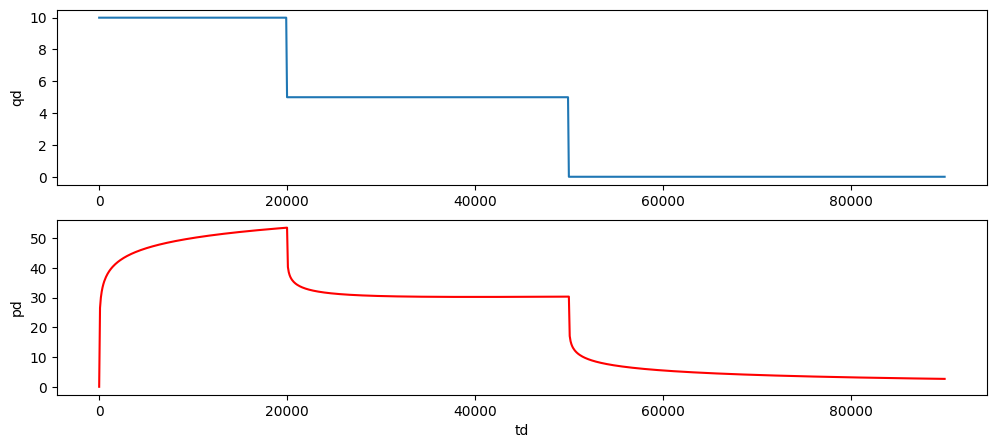

In [6]:
td_arr = np.linspace(1e-3, 9e4, 1000)


td_history = np.array([ 0., 2e4, 5e4 ], dtype=np.float64) 
qd_history = np.array([10., 5., 0.], dtype=np.float64)

plt.rcParams["figure.figsize"] = (12,5)
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.plot(td_arr, q_superposition(td_arr, td_history, qd_history)) 
ax2.plot(td_arr, pd_superposition(td_arr, td_history, qd_history, rd=1), color='red') 
ax2.set_xlabel('td')
ax1.set_ylabel('qd')
ax2.set_ylabel('pd')
plt.show()

In [7]:
def p_superposition_atma(t_hr, t_hist_hr, q_hist_sm3day,
                         k_mD=10, h_m=10, b_m3m3=1.2, mu_cP=1, pi_atma=250, phi=0.2, 
                         ct_1atm=1e-05, rw_m=0.1):
    """
    расчет давления для запуска и последующей остановки скважины
    t_hr - время после запуска в часах
    t_hist_hr - массив времен изменения режимов работы скважин
    q_hist_sm3day - массив дебитов установленных после изменения режима работы
    k_mD=10 - проницаемость, мД, 
    h_m=10 - мощность пласта, м, 
    b_m3m3=1.2 - объемный коэффициент, м3/м3, 
    mu_cP=1 - вязкость нефти, сП, 
    pi_atma=250 - начальное давление, атм, 
    phi=0.2 - пористость, доли единиц, 
    ct_1atm=1e-05 - общая сжимаемость, 1/атм, 
    rw_m=0.1 - радиус скважины
    """
    q_ref=1.
    return p_from_pd_atma(pd_superposition(td_from_t(t_hr, k_mD=k_mD, phi=phi, mu_cP=mu_cP, 
                                                     ct_1atm=ct_1atm, rw_m=rw_m),
                                           td_from_t(t_hist_hr, k_mD=k_mD, phi=phi, mu_cP=mu_cP, 
                                                     ct_1atm=ct_1atm, rw_m=rw_m),
                                           q_hist_sm3day / q_ref, 
                                           1), 
                          k_mD=10, h_m=10, q_sm3day=q_ref, b_m3m3=1.2, mu_cP=1, pi_atma=250)



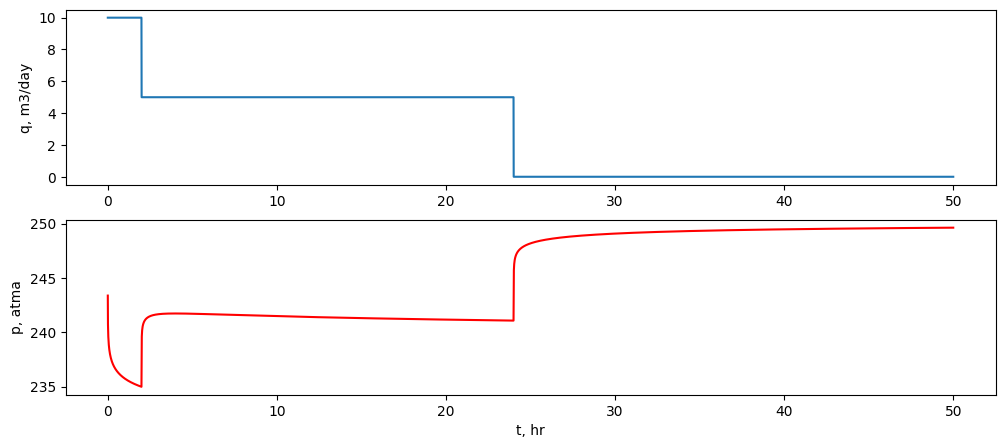

In [8]:
t_arr = np.arange(1e-3, 50, 1e-2)
plt.rcParams["figure.figsize"] = (12,5)

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(t_arr, q_superposition(t_arr, t_history, q_history)) 
ax2.plot(t_arr, p_superposition_atma(t_arr, t_history, q_history), color='red') 
ax2.set_xlabel('t, hr')
ax1.set_ylabel('q, m3/day')
ax2.set_ylabel('p, atma')
plt.show()

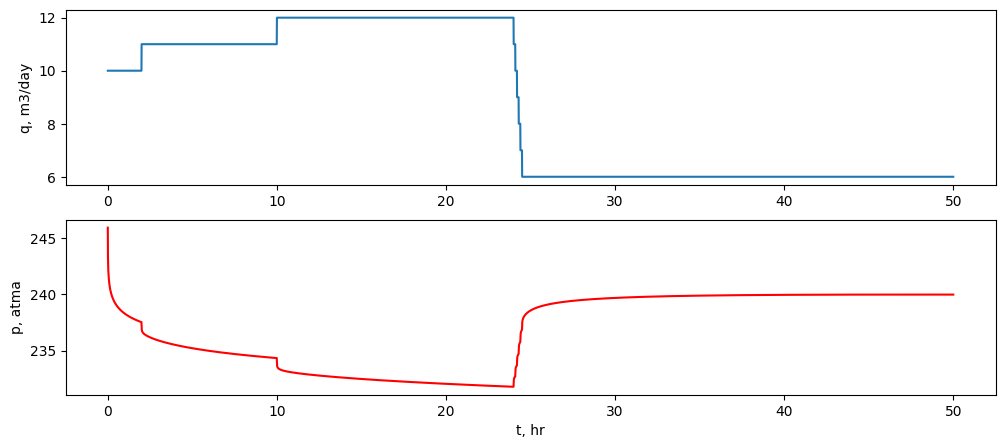

In [9]:

t_history = np.array([0, 2, 10, 24, 24.1,24.2,24.3,24.4,24.5 ])
q_history = np.array([10, 11, 12, 11, 10, 9, 8, 7, 6])

plt.rcParams["figure.figsize"] = (12,5)

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(t_arr, q_superposition(t_arr, t_history, q_history)) 
ax2.plot(t_arr, p_superposition_atma(t_arr, t_history, q_history, 1), color='red') 
ax2.set_xlabel('t, hr')
ax1.set_ylabel('q, m3/day')
ax2.set_ylabel('p, atma')
plt.show()

# 14.3 Случай для произвольной истории дебитов (линейное изменение дебита) <a class="anchor" id="14.3"></a>

Для линейно меняющегося дебита во времени (как и для любой другой зависимости) надо решение проинтегрировать по времени (надо бы подробнее расписать - сделать это позже, например как у Щелкачева в основах нестационарной фильтрации на стр 321).

Для линейной зависимости дебита от времени 
$$Q_D = dQ_D \cdot t_D $$
можно получить выражение
$$p_D(r_D,t_D, dQ_D) =-\frac{dQ_D t_D }{2} \left[ \left( 1+ \frac{r_D^2}{4 t_D} \right) Ei \left(- \dfrac{r_D^2}{4t_D} \right) + e^{-\dfrac{r_D^2}{4t_D}} \right] \tag{14.3}$$ 

где $dQ_D$ - скорость изменения дебита.

Для таблично заданных дебитов и времен можно оценить 

$$dQ_{D(i)} = \dfrac{Q_{D(i)}-Q_{D(i-1)}}{t_{D(i)} - t_{D(i-1)} } \tag{14.4}$$

Cравните формулу (14.3) с формулой (9.68) в книге Щелкачева "Основы неустановившейся фильтрации"

Тогда, используя принцип суперпозиции, можем выписать выражение для изменения давления на скважине и вокруг нее для произвольного момента времени

$$P_{mr.D}(t_D, r_D) = \sum_i  p_D\left(t_D-t_{D(i)}, r_D, dQ_{D(i+1)} - dQ_{D(i)}\right)\cdot \mathcal{H}(t_D-t_{D(i)}) \tag{14.5} $$

где

* $i$ - индекс значения дебита в таблице изменения дебитов
* $dQ_{D(i)}$ - изменение безразмерного дебита относительно безразмерного времени (14.4) 
* $t_{D(i)}$ - безразмерный момент времени - включения дебита с номером $i$
* $t_{D}$ - безразмерный момент времени для которого проводится расчет
* $\mathcal{H}$ - ступенчатая [функция Хевисайда](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%A5%D0%B5%D0%B2%D0%B8%D1%81%D0%B0%D0%B9%D0%B4%D0%B0#:~:text=%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F%20%D0%A5%D0%B5%D0%B2%D0%B8%D1%81%D0%B0%D0%B9%D0%B4%D0%B0%20%D1%88%D0%B8%D1%80%D0%BE%D0%BA%D0%BE%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B5%D1%82%D1%81%D1%8F%20%D0%B2,%D0%B4%D0%BB%D1%8F%20%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%B8%20%D1%8D%D0%BC%D0%BF%D0%B8%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F.)
* $p_D\left(t\right)$ - зависимость безразмерного давление от времени - решение задачи запуска скважины с постоянным единичным дебитом
* $P_{mr.D} $ - безразмерное давление $P_{mr.D}(t_D, r_D)$ учитывающее историю изменения дебитов скважины

следует обратить внимание, при суперпозиции скорость изменения дебита вычисляется как $dQ_{D(i+1)} - dQ_{D(i)}$.  при реализации расчета необходимо предусмотреть, чтобы для первого и последнего шага расчет прошел корректно. Для этого можно, например, добавить к массивам дебитов и времени дополнительный значения в начале и в конце массивов соответствующие постоянным значениям дебита. 

Также надо учитывать, что в приведенном выражении массивы должны начинаться со значений $Q_D=0$



In [10]:
# Решение линейного стока уравнения фильтрации
def pd_lin_ei(td, rd=1, dqd_dtd=1):
    """
    Решение линейного стока уравнения фильтрации
    rd - безразмерное расстояние
    td - безразмерное время
    """
    # при расчете убедимся, что td=0 не повлияет на расчет, 
    # даже если td массив и нулевой только один элемент
    td = np.array(td, dtype = float)
    pd =  (1 + rd**2/4/td) * (-sc.expi(-rd**2 / 4 /td)) - np.exp(-rd**2 / 4 /td)
    return dqd_dtd * td * pd / 2

In [11]:
def pd_superposition_lin(td, td_hist, qd_hist):
    """
    расчет безразмерного давления для последовательности безразмерных дебитов
    td -  время расчета после запуска, безразмерное
    td_hist - массив времен изменения режимов работы скважин, безразмерное
    qd_hist - массив дебитов установленных после изменения режима работы, безразмерное
    """
    # принудительно добавим нули во входные массивы, чтобы учесть запуск скважины
    qdh = np.hstack([qd_hist])
    tdh = np.hstack([td_hist])
    # построим дебиты виртуальных скважин - разности реальных дебитов при переключении
    delta_qd = np.hstack([np.diff(qdh),0])
    delta_td = np.hstack([np.diff(tdh),1])
    
    dq_dt = delta_qd / delta_td
    dq_dt = np.diff(np.hstack([0, delta_qd / delta_td]))
    
    # референсный безразмерный дебит это 1
    
    # векторная магия - время может быть вектором и переключения дебитов тоже вектор
    # надо организовать сумму по временам, каждая из котороых сумма по переключениям
    # делаем при помощи расчета meshgrid и поиска накопленных сумм
    qd_v, td_v =np.meshgrid(delta_qd, td)
    
    dpd = np.cumsum(pd_lin_ei((td_v - tdh), dqd_dtd=dq_dt) * np.heaviside((td_v - tdh), 1),1 )

    return dpd[:,-1]

def p_superposition_lin_atma(t_hr, t_hist_hr, q_hist_sm3day,
                         k_mD=10, h_m=10, b_m3m3=1.2, mu_cP=1, pi_atma=250, phi=0.2, 
                         ct_1atm=1e-05, rw_m=0.1):
    """
    расчет давления для запуска и последующей остановки скважины
    t_hr - время после запуска в часах
    t_hist_hr - массив времен изменения режимов работы скважин
    q_hist_sm3day - массив дебитов установленных после изменения режима работы
    k_mD=10 - проницаемость, мД, 
    h_m=10 - мощность пласта, м, 
    b_m3m3=1.2 - объемный коэффициент, м3/м3, 
    mu_cP=1 - вязкость нефти, сП, 
    pi_atma=250 - начальное давление, атм, 
    phi=0.2 - пористость, доли единиц, 
    ct_1atm=1e-05 - общая сжимаемость, 1/атм, 
    rw_m=0.1 - радиус скважины
    """
    q_ref=1.
    return p_from_pd_atma(pd_superposition_lin(td_from_t(t_hr, k_mD=k_mD, phi=phi, mu_cP=mu_cP, 
                                                     ct_1atm=ct_1atm, rw_m=rw_m),
                                               td_from_t(t_hist_hr, k_mD=k_mD, phi=phi, mu_cP=mu_cP, 
                                                     ct_1atm=ct_1atm, rw_m=rw_m),
                                               q_hist_sm3day / q_ref), 
                          k_mD=10, h_m=10, q_sm3day=q_ref, b_m3m3=1.2, mu_cP=1, pi_atma=250)


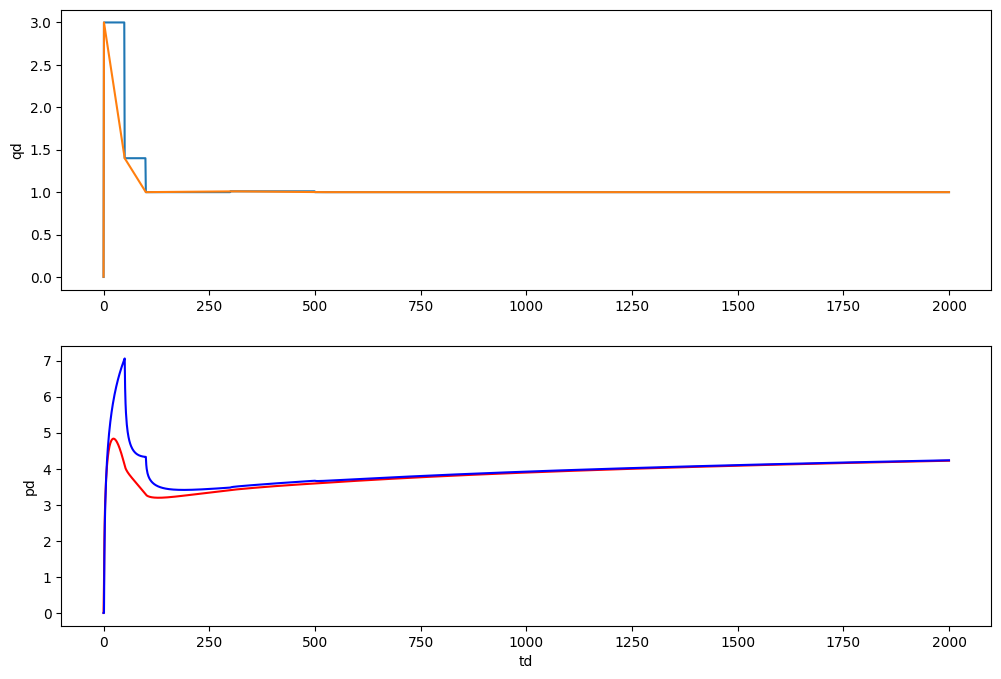

In [12]:
td_arr = np.linspace(1e-3, 2000, 2000)


td_history = np.array([0., 1, 50, 100, 300, 500 ], dtype=np.float64) 
qd_history = np.array([0., 3, 1.4, 1.0, 1.01, 1], dtype=np.float64)

plt.rcParams["figure.figsize"] = (12,8)
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.plot(td_arr, q_superposition(td_arr, td_history, qd_history)) 
ax1.plot(td_arr, np.interp(td_arr, td_history, qd_history)) 
ax2.plot(td_arr, pd_superposition_lin(td_arr, td_history, qd_history), color='red') 
ax2.plot(td_arr, pd_superposition(td_arr, td_history, qd_history, rd=1), color='blue') 
ax2.set_xlabel('td')
ax1.set_ylabel('qd')
ax2.set_ylabel('pd')
plt.show()

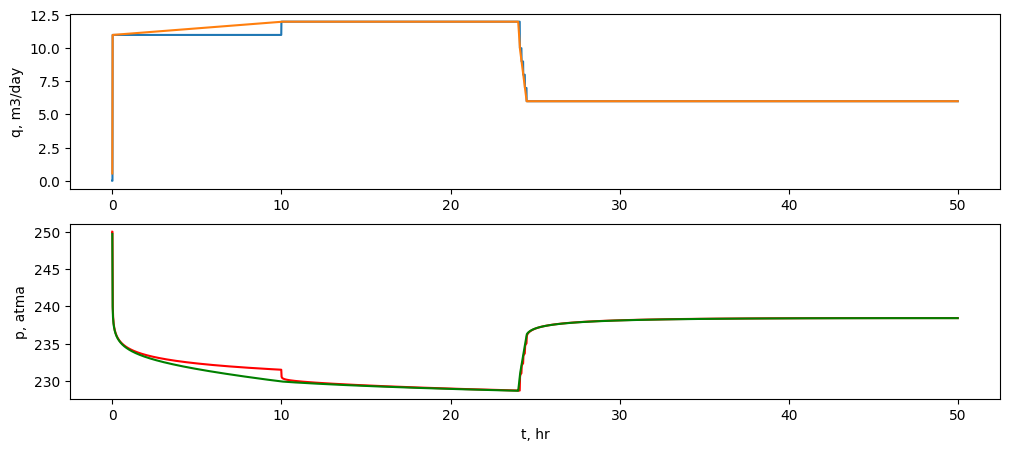

In [13]:
t_history = np.array([0, .02, 10, 24, 24.1,24.2,24.3,24.4,24.5 ])
q_history = np.array([0, 11, 12, 12, 10, 9, 8, 7, 6])

plt.rcParams["figure.figsize"] = (12,5)

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(t_arr, q_superposition(t_arr, t_history, q_history)) 
ax1.plot(t_arr, np.interp(t_arr, t_history, q_history)) 
ax2.plot(t_arr, p_superposition_atma(t_arr, t_history, q_history), color='red') 
ax2.plot(t_arr, p_superposition_lin_atma(t_arr, t_history, q_history), color='green') 
ax2.set_xlabel('t, hr')
ax1.set_ylabel('q, m3/day')
ax2.set_ylabel('p, atma')
plt.show()

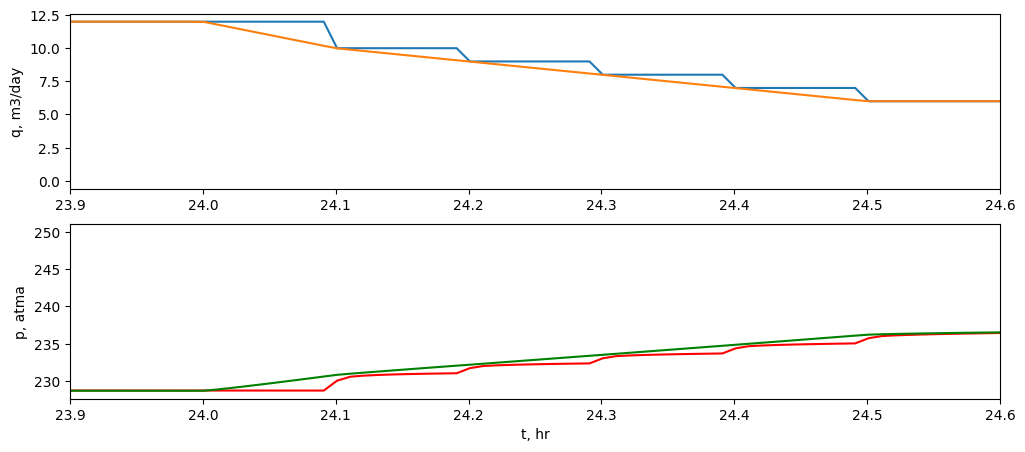

In [14]:
t_history = np.array([0, .02, 10, 24, 24.1,24.2,24.3,24.4,24.5 ])
q_history = np.array([0, 11, 12, 12, 10, 9, 8, 7, 6])

plt.rcParams["figure.figsize"] = (12,5)

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(t_arr, q_superposition(t_arr, t_history, q_history)) 
ax1.plot(t_arr, np.interp(t_arr, t_history, q_history)) 
ax2.plot(t_arr, p_superposition_atma(t_arr, t_history, q_history), color='red') 
ax2.plot(t_arr, p_superposition_lin_atma(t_arr, t_history, q_history), color='green') 
ax2.set_xlabel('t, hr')
ax1.set_ylabel('q, m3/day')
ax2.set_ylabel('p, atma')
ax1.set_xlim([23.9,24.6])
ax2.set_xlim([23.9,24.6])
plt.show()

# 11.2. Задания для самостоятельной работы <a class="anchor" id="11.2"></a>

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте график распределения давления в пласте для композитного пласта. В композитном пласте на расстоянии $r<r_1$ проницаемость равна $k=k_1$, а для $r>=r_1$, $k=k_2$. Как будет меняться воронка депрессии в таком пласте со временем?
2. Постройте двумерную тепловую карту распределения давления в пласте для моделей однородного пласта и композитного пласта. 
3. Постройте график зависимости радиуса влияния скважины от времени.

# Список литературы

1. Kappa. Dynamic Data Analysis. The theory and practice of pressure transient, production analysis, well performance analysis, production logging and the use of permanent downhole gauge data. v4.12.02 Olivier Houze, Didier Viturat, Ole S. Fjare (et al)